In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('house_prices_dataset.csv')
df.head()

,area,price
0,2231.88,558852.17
1,2524.92,632260.29
2,1527.65,382994.25
3,1986.09,497607.86
4,2920.16,730870.84


Creating a scatter plot of area/ price columns

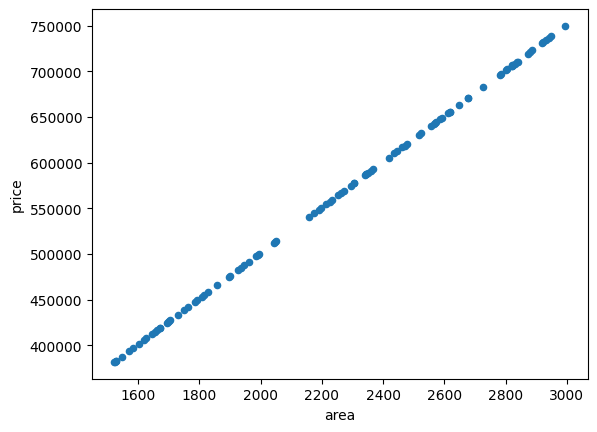

In [5]:
df.plot.scatter(x='area',y='price')
plt.show()

function to calculate predicted value based on given weights and biases

In [6]:
def calculate_prediction(x,w,b):
    return (w*x) + b

Function to calculate the squared error between the predicted and actual values


In [7]:
def calculate_squared_error(row, w, b):
    y_hat = calculate_prediction(row['area'], w, b)
    y = row['price']
    return(y_hat - y) ** 2

Function to calculate the cost function J(w, b)

In [8]:
def calculate_cost(w,b):
    cost = 0
    m = df.shape[0] #no. of training examples
    for index, row in df.iterrows():
        cost += calculate_squared_error(row, w,b)
    return (1/(2*m))*cost

Function to calculate the gradients of the cost function

In [9]:
def calculate_gradients(w,b):
    m = df.shape[0]   #no. of training examples
    dj_dw = 0
    dj_db = 0
    for index, row in df.iterrows():
        y_hat = calculate_prediction(row['area'],w,b)
        y = row['price']
        dj_dw += ((y_hat - y) * row['area'])
        dj_db += (y_hat - y)

    dj_dw = dj_dw / m
    dj_db = dj_db / m

    dj_dw = w - (alpha * dj_dw)  #Update rule for weights
    dj_db = b - (alpha * dj_db)  #Update rule for biases

    return [dj_dw, dj_db]


Function to perform gradient descent and update the weights and biases

In [27]:
def gradient_descent(alpha, epochs, init_w, init_b, print_interval):
    local_w = init_w
    local_b = init_b

    for i in range(0, epochs):
        gradients = calculate_gradients(local_w, local_b)
        new_w, new_b = gradients
        local_w = new_w
        local_b = new_b
        if (i + 1) % print_interval == 0:
            print('Epoch:', i+1)
            print('w change:', new_w)
            print('b change:', new_b)
    return [local_w, local_b]

Running the gradient descent algorithm

In [28]:
alpha = 0.0000001
epochs = 1000
#one complete pass of the training dataset through the algorithm
initial_w = 0
initial_b = 0
print_interval = 100 #Specify the interval for printing changes
final_w, final_b = gradient_descent(alpha, epochs, initial_w, initial_b, print_interval)


Epoch: 100
w change: 250.4254478061784
b change: 0.10746835745449701
Epoch: 200
w change: 250.42544763969588
b change: 0.10785770980462486
Epoch: 300
w change: 250.42544747321338
b change: 0.10824706200372243
Epoch: 400
w change: 250.42544730673097
b change: 0.10863641405179
Epoch: 500
w change: 250.42544714024865
b change: 0.10902576594882757
Epoch: 600
w change: 250.42544697376638
b change: 0.10941511769483511
Epoch: 700
w change: 250.42544680728417
b change: 0.10980446928981277
Epoch: 800
w change: 250.42544664080202
b change: 0.11019382073376056
Epoch: 900
w change: 250.42544647431995
b change: 0.11058317202667854
Epoch: 1000
w change: 250.42544630783792
b change: 0.11097252316856676


(250.42544630783792, 0.11097252316856676)

Displaying the final weights and biases

In [29]:
print('Final weights(w):', final_w)
print('Final biases (b):', final_b)

Final weights(w): 250.42544630783792
Final biases (b): 0.11097252316856676


Plotting the data points and the line defined by w and b

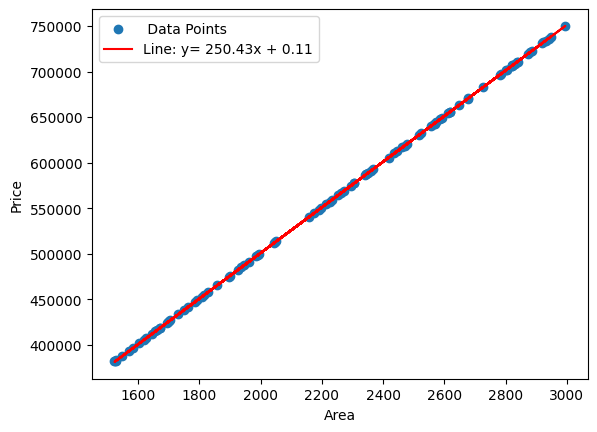

In [30]:
x_values = df['area']
y_values = df['price']
plt.scatter(x_values, y_values, label= ' Data Points')
plt.plot(x_values, calculate_prediction(x_values, final_w, final_b), color = 'red', label = 'Line: y= {:.2f}x + {:.2f}'. format(final_w, final_b))
plt.xlabel('Area')
plt.ylabel('Price')
plt.legend()
plt.show()


Predicting the price for a given area using the obtained weights and biases


In [18]:
area = 2231.88
predicted_price = calculate_prediction(area, final_w, final_b)
print('Predicted price for an area of', area, ":", predicted_price)

Predicted price for an area of 2231.88 : 293843.41585516324
